<a href="https://colab.research.google.com/github/Lupin3-droid/Lupin3-droid/blob/main/mombasa_water_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# Data handling
import pandas as pd
import numpy as np

# Visualization (optional but useful)
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm


In [3]:
# import data
data=pd.read_csv('/content/mombasa_water_econ_dataset_modified.csv')
data.head()

,Cost_of_Living_Index,Volume_of_Water_Consumed_m3,Amount_Billed_KSh,Water_Maintenance_Status,Resident_Type
0,92.034696,34.559085,1523.884174,1,Homestead
1,64.524867,27.822195,1456.919890,1,Institution
2,93.856966,31.637241,1499.504244,0,Homestead
3,55.593789,26.831763,1044.180738,0,Homestead
4,53.309549,27.586786,976.780825,0,Homestead


In [4]:
#round off data to 2dp
data=data.round(2)
data.head()

,Cost_of_Living_Index,Volume_of_Water_Consumed_m3,Amount_Billed_KSh,Water_Maintenance_Status,Resident_Type
0,92.03,34.56,1523.88,1,Homestead
1,64.52,27.82,1456.92,1,Institution
2,93.86,31.64,1499.50,0,Homestead
3,55.59,26.83,1044.18,0,Homestead
4,53.31,27.59,976.78,0,Homestead


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Cost_of_Living_Index         80 non-null     float64
 1   Volume_of_Water_Consumed_m3  80 non-null     float64
 2   Amount_Billed_KSh            80 non-null     float64
 3   Water_Maintenance_Status     80 non-null     int64  
 4   Resident_Type                80 non-null     object 
dtypes: float64(3), int64(1), object(1)
memory usage: 3.3+ KB


In [6]:
round(data.describe(),2)

,Cost_of_Living_Index,Volume_of_Water_Consumed_m3,Amount_Billed_KSh,Water_Maintenance_Status
count,80.00,80.00,80.00,80.0
mean,63.68,30.41,1213.89,0.2
std,17.03,4.52,251.90,0.4
min,25.00,20.45,635.28,0.0
25%,51.00,27.15,1025.66,0.0
50%,64.56,30.42,1226.48,0.0
75%,73.90,32.73,1425.89,0.0
max,98.00,41.65,1728.99,1.0


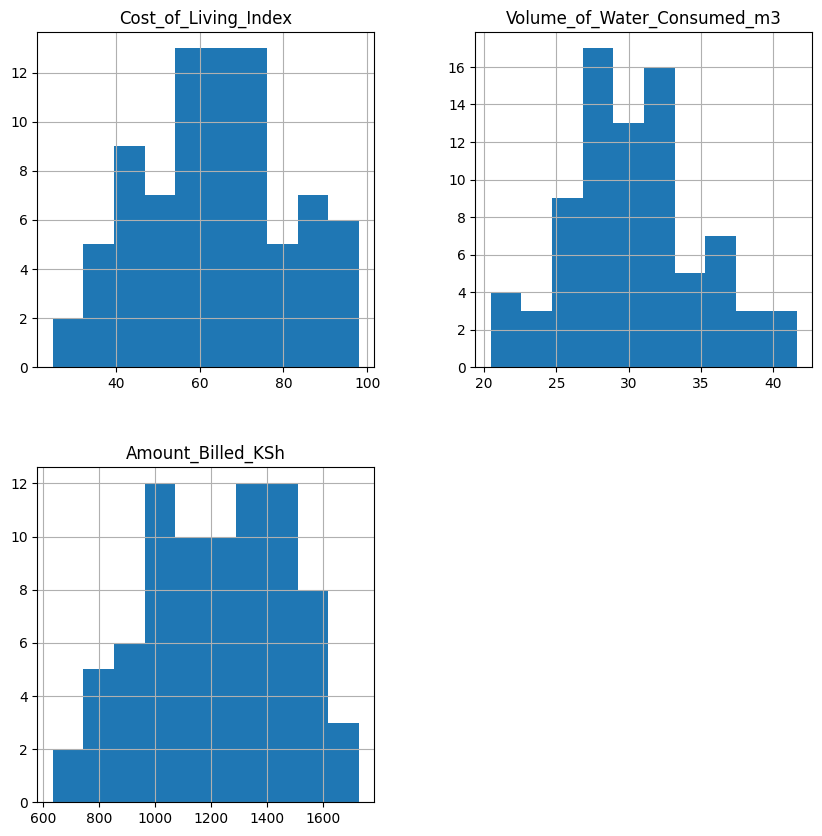

In [9]:
#plot several histograms for the numeric variables.
data.drop('Water_Maintenance_Status',axis=1).hist(figsize=(10,10))
plt.show()

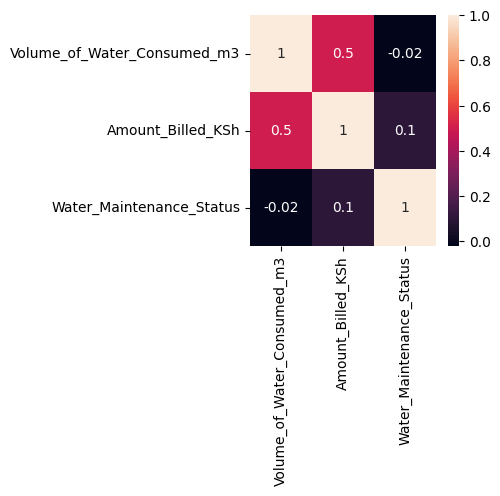

In [17]:
#plotting corellation matrix
corr_matrix=round(data.drop(columns=["Cost_of_Living_Index","Resident_Type"],axis=1).corr(),2)
plt.figure(figsize=(3,3))
sns.heatmap(corr_matrix,annot=True)
plt.show()

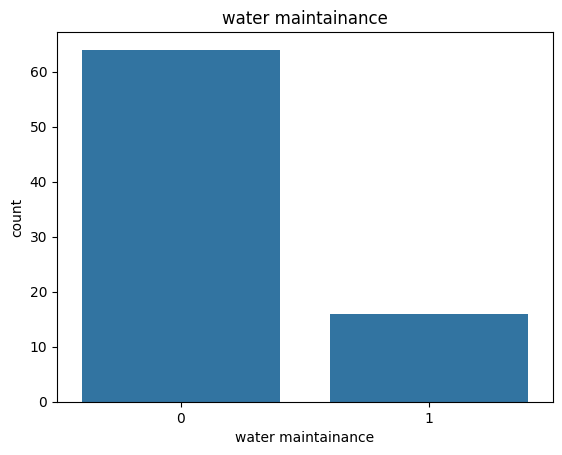

In [20]:
#countplot for water maintainance
sns.countplot(x='Water_Maintenance_Status',data=data)
pd.crosstab(data.Water_Maintenance_Status,columns="count")
plt.figsize=(3,3)
plt.title("water maintainance")
plt.xlabel("water maintainance")
plt.ylabel("count")
plt.show()

model fitting.

In [21]:
#selecting target and features
X=data.drop(columns=["Cost_of_Living_Index","Resident_Type"],axis=1)
y=data["Cost_of_Living_Index"]

In [22]:
X.shape,y.shape

((80, 3), (80,))

In [23]:
#splitting data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


                             OLS Regression Results                             
Dep. Variable:     Cost_of_Living_Index   R-squared:                       0.684
Model:                              OLS   Adj. R-squared:                  0.668
Method:                   Least Squares   F-statistic:                     43.23
Date:                  Sun, 04 May 2025   Prob (F-statistic):           5.26e-15
Time:                          16:15:11   Log-Likelihood:                -232.85
No. Observations:                    64   AIC:                             473.7
Df Residuals:                        60   BIC:                             482.3
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

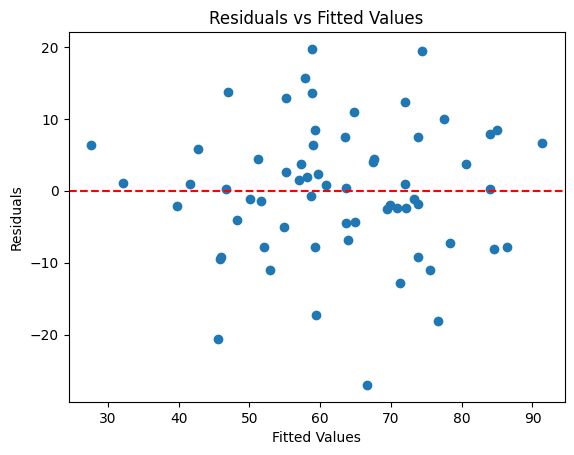

In [39]:
#model fitting using OLs
X_train_sm=sm.add_constant(X_train)
X_test_sm=sm.add_constant(X_test)

model=sm.OLS(y_train,X_train_sm)
results=model.fit()
print(results.summary())

# Access residuals and fitted values from the 'results' object
residuals = results.resid # Changed from model.resid to results.resid
fitted = results.fittedvalues # Changed from model.fittedvalues to results.fittedvalues


plt.scatter(fitted, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()




In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = data[['Volume_of_Water_Consumed_m3', 'Amount_Billed_KSh', 'Water_Maintenance_Status']]
X = sm.add_constant(X)

vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


                       feature        VIF
0                        const  50.031385
1  Volume_of_Water_Consumed_m3   1.337333
2            Amount_Billed_KSh   1.349499
3     Water_Maintenance_Status   1.016904


In [30]:
#model prediction using test data
y_pred=results.predict(X_test_sm)
print(y_pred.head())

30    66.440692
0     86.749997
22    73.681107
31    54.733450
18    45.504251
dtype: float64


30     0.179308
0      5.280003
22   -12.311107
31   -10.103450
18   -14.974251
dtype: float64


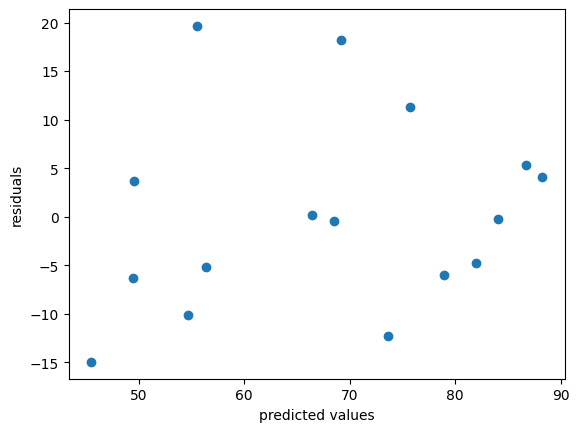

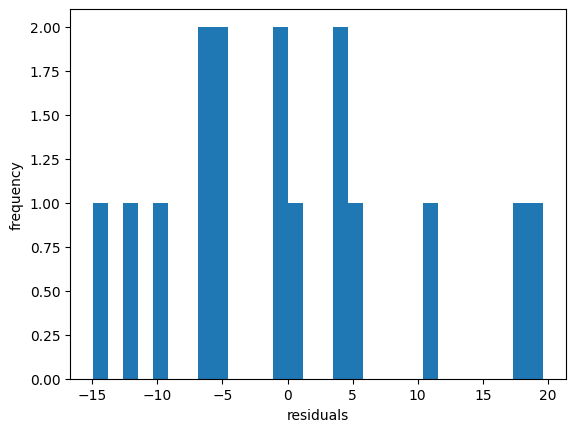

In [36]:
#checking residual for test data
residuals=y_test-y_pred
print(residuals.head())
#plot a scatter plot for the residuals
plt.scatter(y_pred,residuals)
plt.xlabel("predicted values")
plt.ylabel("residuals")
plt.show()
#plot a histogram for the residuals
plt.hist(residuals,bins=30)
plt.xlabel("residuals")
plt.ylabel("frequency")
plt.show()

In [37]:
#extracting the model coefficients
coefficients=results.params
print(coefficients)

const                         -22.536825
Volume_of_Water_Consumed_m3     1.291889
Amount_Billed_KSh               0.037370
Water_Maintenance_Status        7.691855
dtype: float64
